In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [1]:
models = [
    "TinyLlama-1.1B-Chat-v1.0",
    "Qwen2.5-0.5B",
    "Qwen2.5-0.5B-Instruct"
]

datasets = ["GSM8K", "Year Parity", "MultiArith"]

In [ ]:
accuracy_data = {
    "TinyLlama-1.1B-Chat-v1.0": {
        "GSM8K": [0.02, 0.03],
        "Year Parity": [None, 0.61],
        "MultiArith": [None, 0.05]
    },
    "Qwen2.5-0.5B": {
        "GSM8K": [0.27, 0.26],
        "Year Parity": [0.35, None],
        "MultiArith": [0.65, 0.67]
    },
    "Qwen2.5-0.5B-Instruct": {
        "GSM8K": [0.28, 0.26],
        "Year Parity": [None, 0.53],
        "MultiArith": [None, 0.61]
    }
}

In [ ]:
time_data = {
    "TinyLlama-1.1B-Chat-v1.0": {
        "GSM8K": [508.04, 4258.29],
        "Year Parity": [None, 885.07],
        "MultiArith": [None, 1741.00]
    },
    "Qwen2.5-0.5B": {
        "GSM8K": [897.69, 6132.64],
        "Year Parity": [104.50, None],
        "MultiArith": [585.32, 5844.35]
    },
    "Qwen2.5-0.5B-Instruct": {
        "GSM8K": [556.32, 5518.51],
        "Year Parity": [None, 2004.54],
        "MultiArith": [None, 4722.14]
    }
}

In [6]:
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(datasets) * len(models))

<Figure size 1200x600 with 0 Axes>

In [7]:
labels = []
greedy_acc = []
cot_acc = []

for model in models:
    for dataset in datasets:
        labels.append(f"{model}\n{dataset}")
        acc = accuracy_data[model][dataset]
        greedy_acc.append(acc[0] if acc[0] is not None else 0)
        cot_acc.append(acc[1] if acc[1] is not None else 0)

<BarContainer object of 9 artists>

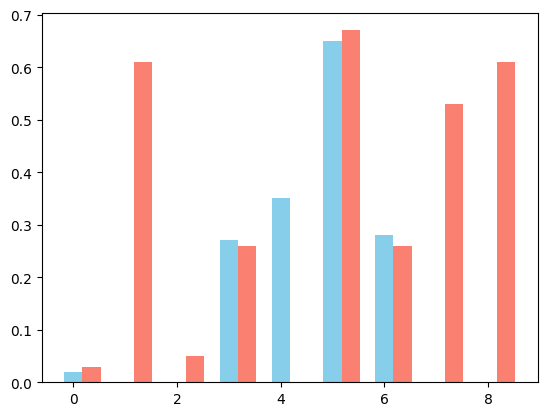

In [ ]:
plt.bar(index, greedy_acc, bar_width, label="Greedy Decoding", color="skyblue")
plt.bar(index + bar_width, cot_acc, bar_width,
        label="CoT-Decoding", color="salmon")

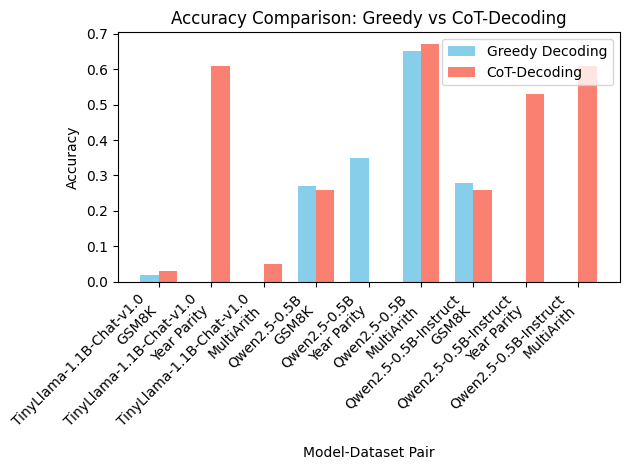

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [ ]:
plt.bar(index, greedy_acc, bar_width, label="Greedy Decoding", color="skyblue")
plt.bar(index + bar_width, cot_acc, bar_width,
        label="CoT-Decoding", color="salmon")
# Customize plot
plt.xlabel("Model-Dataset Pair")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison: Greedy vs CoT-Decoding")
plt.xticks(index + bar_width / 2, labels, rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.savefig("accuracy_comparison.png")  # Save for appendix
plt.show()
plt.figure(figsize=(12, 6))

In [13]:
greedy_time = []
cot_time = []

for model in models:
    for dataset in datasets:
        time = time_data[model][dataset]
        greedy_time.append(time[0] if time[0] is not None else 0)
        cot_time.append(time[1] if time[1] is not None else 0)

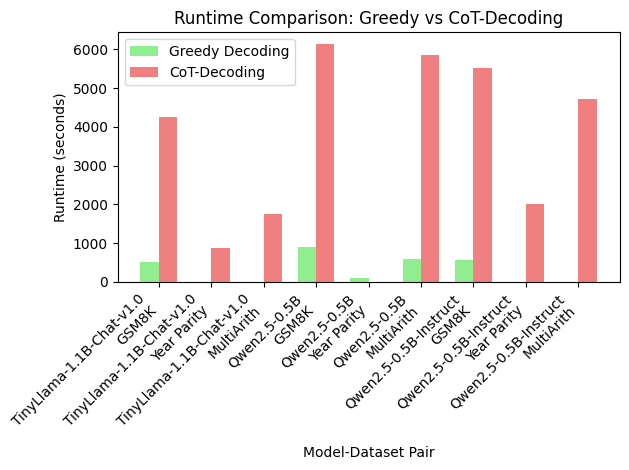

In [ ]:
plt.bar(index, greedy_time, bar_width,
        label="Greedy Decoding", color="lightgreen")
plt.bar(index + bar_width, cot_time, bar_width,
        label="CoT-Decoding", color="lightcoral")

# Customize plot
plt.xlabel("Model-Dataset Pair")
plt.ylabel("Runtime (seconds)")
plt.title("Runtime Comparison: Greedy vs CoT-Decoding")
plt.xticks(index + bar_width / 2, labels, rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.savefig("runtime_comparison.png")  # Save for appendix
plt.show()